# **Working memory training**: behavioral progress during fMRI scanning sessions

The code below allows to visualize and analize data from 6-week working memory training study. Participants were scanned four times while performing dual n-back (Jaeggi et al., 2018). 

Three performance measures were calculated: 

- accuracy
- d' (dprime)
- penallized reaction time (prt)

We additionally calculated block-to-block standard diviation for each of this measures.


**Last edited:** 21-11-2019

Step 0: Setup
--------------------------------------

In [2]:
# Loading packages
library(psych)
library(tidyverse)
library(data.table)
library(nlme)
library(broom)

# Customizing theme for plotting
theme_training <- theme_bw() + theme(axis.text.y = element_text(size=25, colour='#262626ff'),
          axis.text.x = element_text(size=25, colour='#262626ff'),
          axis.title.y = element_text(size=25, colour='#262626ff'),
          axis.title.x  = element_text(size=25, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.8),
          panel.background = element_rect(fill="transparent",colour=NA),
          plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          strip.background =element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=25),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.15, "cm"),
          aspect.ratio = 1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse



Step 1: Preparing data
--------------------------------------

In [3]:
# Setting working directory
setwd("~/Dropbox/Projects/LearningBrain/")

# Loading data
performance <- read.csv("data/behavioral/WM_fmri_behaviour_mean_tidy.csv")
performance$Group <- factor(performance$Group, levels = c('Control', 'Experimental'))
performance$Session <- factor(performance$Session, levels = c('Naive', 'Early', 'Middle', 'Late'))

# Removing subjects with high motion
performance <- performance %>% filter(!(Subject %in% c('sub-13', 'sub-21', 'sub-23', 'sub-50')))
head(performance)

Subject,Session,Condition,Group,Accuracy,pRT,Dprime
sub-01,Naive,1-back,Control,0.8666667,1134.228,3.437119
sub-01,Naive,2-back,Control,0.7833333,1520.929,2.514055
sub-01,Early,1-back,Control,0.8666667,1141.753,3.429125
sub-01,Early,2-back,Control,0.8666667,1382.947,3.117902
sub-01,Middle,1-back,Control,0.8000000,1329.742,2.758558
sub-01,Middle,2-back,Control,0.9000000,1202.948,3.460899


Step 2: Multilevel modelling (MLM): d-prime change
----------------------------------------------------

In [31]:
baseline <- lme(Dprime ~ 1, random = ~ 1|Subject/Session/Condition, data = performance, method = 'ML',  control = list(opt = "optim"), na.action = na.exclude)
condition <- update(baseline, .~. + Condition)
session <- update(condition, .~. + Session)
group <- update(session, .~. + Group)

condition_session <- update(group, .~. + Condition:Session)
condition_group <- update(condition_session, .~. + Condition:Group)
session_group <- update(condition_group, .~. + Session:Group)
condition_session_group <- update(session_group, .~. + Condition:Session:Group)

anova(baseline, condition, session, group, condition_session, condition_group, session_group, condition_session_group)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = Dprime ~ 1, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",1,5,752.4170,771.5025,-371.2085,,NA,NA
condition,"lme.formula(fixed = Dprime ~ Condition, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",2,6,660.2039,683.1066,-324.1020,1 vs 2,94.213051,2.833265e-22
session,"lme.formula(fixed = Dprime ~ Condition + Session, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",3,9,593.8587,628.2127,-287.9293,2 vs 3,72.345245,1.342635e-15
group,"lme.formula(fixed = Dprime ~ Condition + Session + Group, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",4,10,593.6771,631.8482,-286.8385,3 vs 4,2.181581,1.396709e-01
condition_session,"lme.formula(fixed = Dprime ~ Condition + Session + Group + Condition:Session, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",5,13,567.3210,616.9435,-270.6605,4 vs 5,32.356052,4.402907e-07
condition_group,"lme.formula(fixed = Dprime ~ Condition + Session + Group + Condition:Session + Condition:Group, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",6,14,537.4199,590.8595,-254.7100,5 vs 6,31.901122,1.622234e-08
session_group,"lme.formula(fixed = Dprime ~ Condition + Session + Group + Condition:Session + Condition:Group + Session:Group, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",7,17,518.6824,583.5733,-242.3412,6 vs 7,24.737460,1.752040e-05
condition_session_group,"lme.formula(fixed = Dprime ~ Condition + Session + Group + Condition:Session + Condition:Group + Session:Group + Condition:Session:Group, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",8,20,515.2919,591.6342,-237.6460,7 vs 8,9.390509,2.452514e-02


In [5]:
summary(condition_session_group)

Linear mixed-effects model fit by maximum likelihood
 Data: performance 
       AIC      BIC   logLik
  515.2919 591.6342 -237.646

Random effects:
 Formula: ~1 | Subject
        (Intercept)
StdDev:   0.4153026

 Formula: ~1 | Session %in% Subject
        (Intercept)
StdDev:   0.1581795

 Formula: ~1 | Condition %in% Session %in% Subject
        (Intercept)  Residual
StdDev:   0.3818291 0.1352745

Fixed effects: Dprime ~ Condition + Session + Group + Condition:Session + Condition:Group +      Session:Group + Condition:Session:Group 
                                                    Value Std.Error  DF
(Intercept)                                      3.298577 0.1344600 160
Condition2-back                                 -1.162791 0.1280987 160
SessionEarly                                     0.093119 0.1375185 120
SessionMiddle                                    0.059966 0.1375185 120
SessionLate                                      0.278640 0.1375185 120
GroupExperimental            

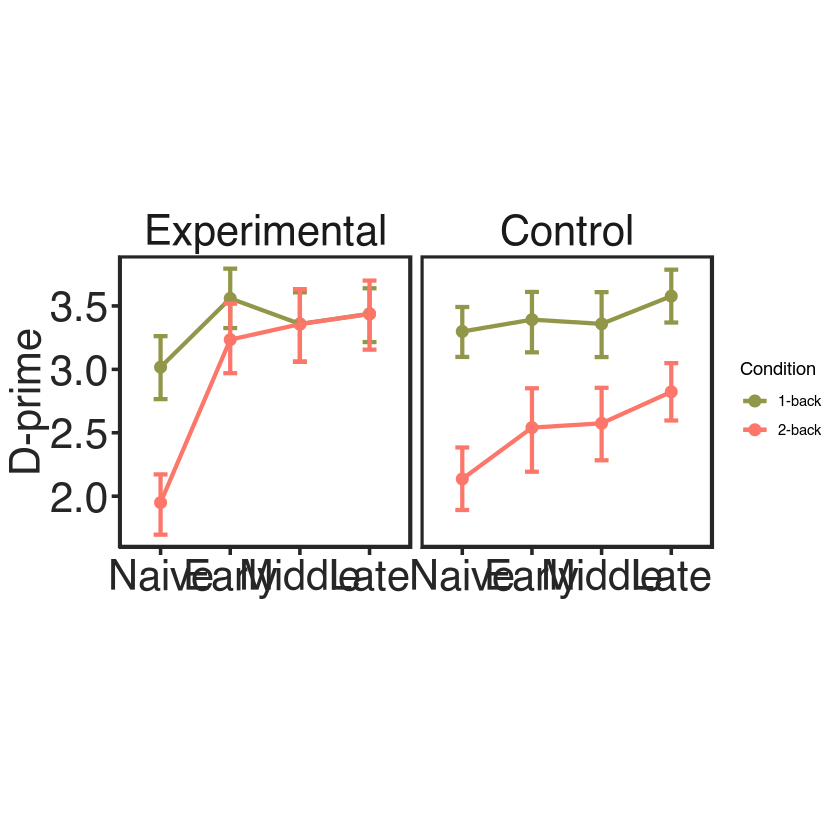

In [23]:
performance$Group <- factor(performance$Group, levels = c('Experimental', 'Control'))

p <- ggplot(performance, aes(x = Session, y = Dprime, color = Condition)) +
    stat_summary(fun.y = mean, geom = 'point', size = 3) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Condition)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    scale_colour_manual(values=c('#919649', '#fc766a')) +
    theme_training +
    ylab('D-prime') +
    xlab('') +
    facet_wrap('~Group')

p

#ggsave("figures/dprime_lineplot.pdf", plot = p, width = 12, height = 6, dpi = 300)  

Step 4: T-tests: d-prime change
----------------------------------------------------

In [25]:
# Differences between first and last sessions for each group and task conditions
beh_mean_nl <- performance %>% filter(Session %in% c('Naive', 'Late'))

exp1 <-  beh_mean_nl %>% filter(Group == 'Experimental') %>% filter(Condition == '1-back')
exp2 <-  beh_mean_nl %>% filter(Group == 'Experimental') %>% filter(Condition == '2-back')
con1 <-  beh_mean_nl %>% filter(Group == 'Control') %>% filter(Condition == '1-back')
con2 <-  beh_mean_nl %>% filter(Group == 'Control') %>% filter(Condition == '2-back')

t.test(exp1$Dprime ~ exp1$Session, paired = TRUE)
t.test(exp2$Dprime ~ exp2$Session, paired = TRUE)
t.test(con1$Dprime ~ con1$Session, paired = TRUE)
t.test(con2$Dprime ~ con2$Session, paired = TRUE)

# Multiply by 4 to correct for mulriple comparisons (Bonferroni)


	Paired t-test

data:  exp1$Dprime by exp1$Session
t = -3.1859, df = 20, p-value = 0.004643
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6964893 -0.1453159
sample estimates:
mean of the differences 
             -0.4209026 



	Paired t-test

data:  exp2$Dprime by exp2$Session
t = -9.1731, df = 20, p-value = 1.323e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.824645 -1.148541
sample estimates:
mean of the differences 
              -1.486593 



	Paired t-test

data:  con1$Dprime by con1$Session
t = -1.9172, df = 20, p-value = 0.0696
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.58180020  0.02452066
sample estimates:
mean of the differences 
             -0.2786398 



	Paired t-test

data:  con2$Dprime by con2$Session
t = -6.451, df = 20, p-value = 2.726e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9092642 -0.4649142
sample estimates:
mean of the differences 
             -0.6870892 


In [12]:
t.test(exp2[exp2$Session == 'Naive', ]$Dprime - exp2[exp2$Session == 'Late', ]$Dprime,
con2[con2$Session == 'Naive', ]$Dprime - con2[con2$Session == 'Late', ]$Dprime, paired = FALSE)

t.test(exp1[exp1$Session == 'Naive', ]$Dprime - exp1[exp1$Session == 'Late', ]$Dprime,
con1[con1$Session == 'Naive', ]$Dprime - con1[con1$Session == 'Late', ]$Dprime, paired = FALSE)

# Multiply by 2 to correct for mulriple comparisons (Bonferroni)


	Welch Two Sample t-test

data:  exp2[exp2$Session == "Naive", ]$Dprime - exp2[exp2$Session ==  and con2[con2$Session == "Naive", ]$Dprime - con2[con2$Session ==     "Late", ]$Dprime and     "Late", ]$Dprime
t = -4.1227, df = 34.561, p-value = 0.0002224
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1933766 -0.4056317
sample estimates:
 mean of x  mean of y 
-1.4865933 -0.6870892 



	Welch Two Sample t-test

data:  exp1[exp1$Session == "Naive", ]$Dprime - exp1[exp1$Session ==  and con1[con1$Session == "Naive", ]$Dprime - con1[con1$Session ==     "Late", ]$Dprime and     "Late", ]$Dprime
t = -0.72432, df = 39.642, p-value = 0.4731
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5393303  0.2548046
sample estimates:
 mean of x  mean of y 
-0.4209026 -0.2786398 


In [13]:
# Difference between 1-back and 2-back pRT in the last session (Experimental)
t.test(exp1[exp1$Session == 'Late', ]$Dprime, exp2[exp2$Session == 'Late', ]$Dprime, paired = TRUE)

# Difference between 1-back and 2-back pRT in the last session (Control)
t.test(con1[con1$Session == 'Late', ]$Dprime, con2[con2$Session == 'Late', ]$Dprime, paired = TRUE)

# Correct for 2 tests


	Paired t-test

data:  exp1[exp1$Session == "Late", ]$Dprime and exp2[exp2$Session == "Late", ]$Dprime
t = 0.023354, df = 20, p-value = 0.9816
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1822009  0.1863269
sample estimates:
mean of the differences 
             0.00206299 



	Paired t-test

data:  con1[con1$Session == "Late", ]$Dprime and con2[con2$Session == "Late", ]$Dprime
t = 4.913, df = 20, p-value = 8.397e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4340626 1.0746203
sample estimates:
mean of the differences 
              0.7543414 


In [ ]:
p <- performance %>% filter(Session %in% c('Naive', 'Late')) %>%
    ggplot(aes(x = Group, y = Dprime, fill = Session)) + 
    geom_point(aes(col = Session), position=position_jitterdodge(dodge.width=0.9), alpha = 0.6, size = 4) +
    geom_boxplot(alpha = 0.4, outlier.shape = NA, position=position_dodge(width=0.8), size = 1) + 
    scale_fill_manual(values=c('#daa03d', '#755841')) +
    scale_color_manual(values=c('#daa03d', '#755841')) +
    facet_wrap(~Condition) +
    ylim(0, 6.2) +
    ylab('D-prime') +
    xlab(' ') +
    theme_training
p

ggsave("figures/dprime_ttests.pdf", plot = p, width = 12, height = 6, dpi = 300)  

---------

Step 2: Multilevel modelling (MLM): pRT change
----------------------------------------------------

In [14]:
# Differences between first and last sessions for each group and task conditions
beh_mean_nl <- performance %>% filter(Session %in% c('Naive', 'Late'))

exp1 <-  beh_mean_nl %>% filter(Group == 'Experimental') %>% filter(Condition == '1-back')
exp2 <-  beh_mean_nl %>% filter(Group == 'Experimental') %>% filter(Condition == '2-back')
con1 <-  beh_mean_nl %>% filter(Group == 'Control') %>% filter(Condition == '1-back')
con2 <-  beh_mean_nl %>% filter(Group == 'Control') %>% filter(Condition == '2-back')

In [15]:
baseline <- lme(pRT ~ 1, random = ~ 1|Subject/Session/Condition, data = performance, method = 'ML',  control = list(opt = "optim"), na.action = na.exclude)
condition <- update(baseline, .~. + Condition)
session <- update(condition, .~. + Session)
group <- update(session, .~. + Group)

condition_session <- update(group, .~. + Condition:Session)
condition_group <- update(condition_session, .~. + Condition:Group)
session_group <- update(condition_group, .~. + Session:Group)
condition_session_group <- update(session_group, .~. + Condition:Session:Group)

anova(baseline, condition, session, group, condition_session, condition_group, session_group, condition_session_group)
summary(condition_session_group)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = pRT ~ 1, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",1,5,4570.636,4589.721,-2280.318,,NA,NA
condition,"lme.formula(fixed = pRT ~ Condition, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",2,6,4481.600,4504.503,-2234.800,1 vs 2,91.035487,1.411184e-21
session,"lme.formula(fixed = pRT ~ Condition + Session, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",3,9,4418.314,4452.668,-2200.157,2 vs 3,69.286067,6.069075e-15
group,"lme.formula(fixed = pRT ~ Condition + Session + Group, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",4,10,4417.458,4455.629,-2198.729,3 vs 4,2.856243,9.101988e-02
condition_session,"lme.formula(fixed = pRT ~ Condition + Session + Group + Condition:Session, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",5,13,4388.000,4437.623,-2181.000,4 vs 5,35.457906,9.749398e-08
condition_group,"lme.formula(fixed = pRT ~ Condition + Session + Group + Condition:Session + Condition:Group, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",6,14,4337.519,4390.959,-2154.760,5 vs 6,52.480790,4.344775e-13
session_group,"lme.formula(fixed = pRT ~ Condition + Session + Group + Condition:Session + Condition:Group + Session:Group, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",7,17,4309.944,4374.835,-2137.972,6 vs 7,33.575256,2.435435e-07
condition_session_group,"lme.formula(fixed = pRT ~ Condition + Session + Group + Condition:Session + Condition:Group + Session:Group + Condition:Session:Group, data = performance, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",8,20,4294.694,4371.036,-2127.347,7 vs 8,21.250203,9.340210e-05


Linear mixed-effects model fit by maximum likelihood
 Data: performance 
       AIC      BIC    logLik
  4294.694 4371.036 -2127.347

Random effects:
 Formula: ~1 | Subject
        (Intercept)
StdDev:    176.6045

 Formula: ~1 | Session %in% Subject
        (Intercept)
StdDev:    71.91143

 Formula: ~1 | Condition %in% Session %in% Subject
        (Intercept) Residual
StdDev:    86.23509 40.93254

Fixed effects: pRT ~ Condition + Session + Group + Condition:Session + Condition:Group +      Session:Group + Condition:Session:Group 
                                                    Value Std.Error  DF
(Intercept)                                     1180.6208  47.68248 160
Condition2-back                                  297.6700  30.18603 160
SessionEarly                                     -27.8170  37.79314 120
SessionMiddle                                    -29.8691  37.79314 120
SessionLate                                      -73.9494  37.79314 120
GroupExperimental               

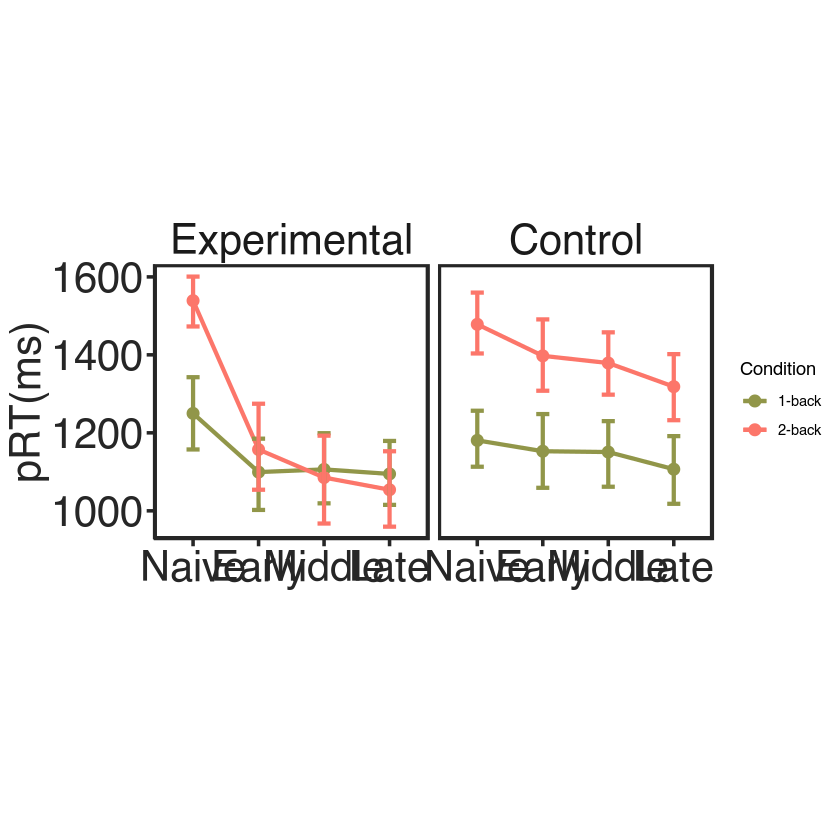

In [30]:
performance$Group <- factor(performance$Group, levels = c('Experimental', 'Control'))

p <- ggplot(performance, aes(x = Session, y = pRT, color = Condition)) +
    stat_summary(fun.y = mean, geom = 'point', size = 3) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Condition)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    scale_colour_manual(values=c('#919649', '#fc766a')) +
    theme_training +
    ylab('pRT(ms)') +
    xlab('') +
    facet_wrap('~Group')
p

ggsave("figures/prt_lineplot.pdf", plot = p, width = 12, height = 6, dpi = 300)  

Step 3: T-tests: pRT change
----------------------------------------------------

In [18]:
t.test(exp1$pRT ~ exp1$Session, paired = TRUE)
t.test(exp2$pRT ~ exp2$Session, paired = TRUE)
t.test(con1$pRT ~ con1$Session, paired = TRUE)
t.test(con2$pRT ~ con2$Session, paired = TRUE)

# All p-values should be multiplied by 4, to correct for multiple comparisons (Bonferroni correction)


	Paired t-test

data:  exp1$pRT by exp1$Session
t = 3.9041, df = 20, p-value = 0.0008803
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  72.28996 238.16980
sample estimates:
mean of the differences 
               155.2299 



	Paired t-test

data:  exp2$pRT by exp2$Session
t = 10.16, df = 20, p-value = 2.42e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 385.4030 584.5377
sample estimates:
mean of the differences 
               484.9703 



	Paired t-test

data:  con1$pRT by con1$Session
t = 1.7746, df = 20, p-value = 0.09118
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.97277 160.87156
sample estimates:
mean of the differences 
               73.94939 



	Paired t-test

data:  con2$pRT by con2$Session
t = 3.9544, df = 20, p-value = 0.0007827
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  75.55513 244.26164
sample estimates:
mean of the differences 
               159.9084 


In [21]:
# Differences in changes of behavior between groups

t.test(exp2[exp2$Session == 'Naive', ]$pRT - exp2[exp2$Session == 'Late', ]$pRT,
con2[con2$Session == 'Naive', ]$pRT - con2[con2$Session == 'Late', ]$pRT, paired = FALSE)

t.test(exp1[exp1$Session == 'Naive', ]$pRT - exp1[exp1$Session == 'Late', ]$pRT,
con1[con1$Session == 'Naive', ]$pRT - con1[con1$Session == 'Late', ]$pRT, paired = FALSE)

# All p-values should be multiplied by 2, to correct for multiple comparisons (Bonferroni correction)


	Welch Two Sample t-test

data:  exp2[exp2$Session == "Naive", ]$pRT - exp2[exp2$Session == "Late",  and con2[con2$Session == "Naive", ]$pRT - con2[con2$Session == "Late",     ]$pRT and     ]$pRT
t = 5.1961, df = 38.948, p-value = 6.756e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 198.5192 451.6047
sample estimates:
mean of x mean of y 
 484.9703  159.9084 



	Welch Two Sample t-test

data:  exp1[exp1$Session == "Naive", ]$pRT - exp1[exp1$Session == "Late",  and con1[con1$Session == "Naive", ]$pRT - con1[con1$Session == "Late",     ]$pRT and     ]$pRT
t = 1.4112, df = 39.912, p-value = 0.1659
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -35.1338 197.6948
sample estimates:
mean of x mean of y 
155.22988  73.94939 


In [28]:
# Difference between 1-back and 2-back pRT in the last session (Experimental)
t.test(exp1[exp1$Session == 'Late', ]$pRT, exp2[exp2$Session == 'Late', ]$pRT, paired = TRUE)

# Difference between 1-back and 2-back pRT in the last session (Control)
t.test(con1[con1$Session == 'Late', ]$pRT, con2[con2$Session == 'Late', ]$pRT, paired = TRUE)

# All p-values should be multiplied by 2, to correct for multiple comparisons (Bonferroni correction)


	Paired t-test

data:  exp1[exp1$Session == "Late", ]$pRT and exp2[exp2$Session == "Late", ]$pRT
t = 1.5214, df = 20, p-value = 0.1438
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.06400  96.24777
sample estimates:
mean of the differences 
               40.59189 



	Paired t-test

data:  con1[con1$Session == "Late", ]$pRT and con2[con2$Session == "Late", ]$pRT
t = -5.7154, df = 20, p-value = 1.359e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -288.9795 -134.4426
sample estimates:
mean of the differences 
              -211.7111 


In [19]:
summary_performance <- performance %>% 
    group_by(Session, Group, Condition) %>% filter(Session %in% c('Naive', 'Late'))%>%
    summarize(mpRT = mean(pRT), mDprime = mean(Dprime), mAcc = mean(Accuracy))

summary_performance 

Session,Group,Condition,mpRT,mDprime,mAcc
Naive,Experimental,1-back,1249.853,3.017384,0.8277778
Naive,Experimental,2-back,1539.001,1.949630,0.6206349
Naive,Control,1-back,1180.621,3.298577,0.8682540
Naive,Control,2-back,1478.291,2.135787,0.6769841
Late,Experimental,1-back,1094.623,3.438286,0.8650794
Late,Experimental,2-back,1054.031,3.436223,0.8626984
Late,Control,1-back,1106.671,3.577217,0.8912698
Late,Control,2-back,1318.382,2.822876,0.7880952


In [20]:
# Percentage of improvement
1 - (summary_performance %>% filter(Session=='Naive') / summary_performance %>% filter(Session=='Late')) %>% 
select(mpRT, mDprime, mAcc) 

Warning message in Ops.factor(left, right):
“‘/’ not meaningful for factors”Warning message in Ops.factor(left, right):
“‘/’ not meaningful for factors”Warning message in Ops.factor(left, right):
“‘/’ not meaningful for factors”

mpRT,mDprime,mAcc
-0.14181132,0.12241640,0.04311927
-0.46011024,0.43262419,0.28058878
-0.06682146,0.07789289,0.02582369
-0.12129135,0.24340043,0.14098691


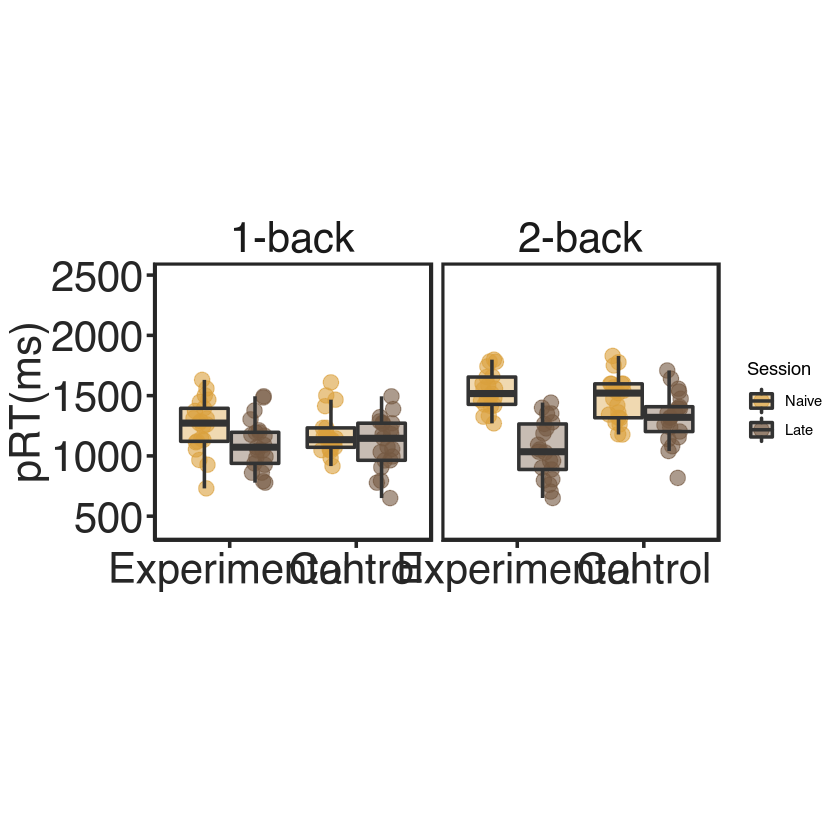

In [29]:
p <- performance %>% filter(Session %in% c('Naive', 'Late')) %>%
    ggplot(aes(x = Group, y = pRT, fill = Session)) + 
    geom_point(aes(col = Session), position=position_jitterdodge(dodge.width=0.9), alpha = 0.6, size = 4) +
    geom_boxplot(alpha = 0.4, outlier.shape = NA, position=position_dodge(width=0.8), size = 1) + 
    scale_fill_manual(values=c('#daa03d', '#755841')) +
    scale_color_manual(values=c('#daa03d', '#755841')) +
    facet_wrap(~Condition) +
    ylim(400, 2500) +
    ylab('pRT(ms)') +
    xlab(' ') +
    theme_training
p

ggsave("figures/prt_ttests.pdf", plot = p, width = 12, height = 6, dpi = 300)  

# Block-to-block variability

In [ ]:
head(performance)

In [ ]:
performance_variability <- read.csv('data/behavioral/WM_fmri_behaviour_variability_tidy.csv')
performance_variability$Group <- factor(performance_variability$Group, levels = c('Control', 'Experimental'))
performance_variability$Session <- factor(performance_variability$Session, levels = c('Naive', 'Early', 'Middle', 'Late'))

performance_variability <- performance_variability %>% 
                            filter(!(Subject %in% c('sub-13', 'sub-21', 'sub-23', 'sub-50')))


head(performance_variability)

## pRT variability

In [ ]:
baseline <- lme(pRT_std ~ 1, random = ~ 1|Subject/Session, data = performance_variability, method = 'ML',  control = list(opt = "optim"), na.action = na.exclude)
session <- update(baseline, .~. + Session)
group <- update(session, .~. + Group)
session_group <- update(group, .~. + Session:Group)

anova(baseline, session, group, session_group)

In [ ]:
summary(group)

In [ ]:
p <- ggplot(performance_variability, aes(x = Session, y = pRT_std, col = Group)) +
    stat_summary(fun.y = mean, geom = 'point', size = 3) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Group)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    scale_colour_manual(values=c('#379dbc','#ee8c00')) +
    theme_training +
    ylab(expression(paste(sigma ['pRT'], ' (ms)'))) +
    xlab('') 
p

p <- ggplot(performance_variability, aes(x = Session, y = pRT_std,col=Group)) +
    geom_boxplot(size=1) +
    ylab(expression(paste(sigma ['pRT'], ' (ms)'))) +
    xlab('') + 
    scale_colour_manual(values=c('#379dbc','#ee8c00')) +
    theme_training
p


## D-prime variability

In [ ]:
baseline <- lme(Dprime_std ~ 1, random = ~ 1|Subject/Session, data = performance_variability, method = 'ML',  control = list(opt = "optim"), na.action = na.exclude)
session <- update(baseline, .~. + Session)
group <- update(session, .~. + Group)
session_group <- update(group, .~. + Session:Group)

anova(baseline, session, group, session_group)

In [ ]:
summary(session)

In [ ]:
p <- ggplot(performance_variability, aes(x = Session, y = Dprime_std, col = Group)) +
    stat_summary(fun.y = mean, geom = 'point', size = 3) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Group)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    scale_colour_manual(values=c('#379dbc','#ee8c00')) +
    theme_training +
    ylab(expression(paste(sigma['D-prime']))) +
    xlab('') 
p

p <- ggplot(performance_variability, aes(x = Session, y = Dprime_std, col = Group)) +
    geom_boxplot(size=1) +
    ylab(expression(paste(sigma['D-prime']))) +
    xlab('') + 
    scale_colour_manual(values=c('#379dbc','#ee8c00')) +
    theme_training
p
